In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-sexual-abuse-awareness-knowledge-level/CSA-Data.csv


# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Read Data

In [3]:
data=pd.read_csv('/kaggle/input/child-sexual-abuse-awareness-knowledge-level/CSA-Data.csv')

# Show 10 frist row in data

In [4]:
data.head(10)

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate
5,Agree,Disagree,Agree,Agree,Yes,Yes,Yes,No,Intermediate
6,Disagree,Disagree,Agree,Agree,Yes,No,Yes,Yes,Intermediate
7,Disagree,Disagree,Disagree,Disagree,Yes,Yes,Yes,No,Intermediate
8,Disagree,Disagree,Disagree,Disagree,Yes,Yes,No,Yes,Intermediate
9,Agree,Disagree,Agree,Agree,Yes,Yes,Yes,Yes,Intermediate


In [5]:
x=1
for col in data.columns:
    print(f'column {x} is :',col)
    x+=1

column 1 is : "Children are safe among family members such as grandparents, uncles, aunts, cousins"
column 2 is : "Children are mainly abused by strangers in our society"
column 3 is : Male children dont need sexual abuse prevention knowledge
column 4 is : "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"
column 5 is : Do you know what child grooming is?
column 6 is : Do you know what signs to look for to identify if your child has been abused?
column 7 is : Do you think children need post abuse counseling for recovering?
column 8 is : Do you think you should take legal action against the abuser of your child?
column 9 is : Knowledge Level


# Data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

# Show Data contain isnull

In [7]:
data.isnull().sum()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     0
"Children are mainly abused by strangers in our society"                                                  0
Male children dont need sexual abuse prevention knowledge                                                 0
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    0
Do you know what child grooming is?                                                                       0
Do you know what signs to look for to identify if your child has been abused?                             0
Do you think children need post abuse counseling for recovering?                                          0
Do you think you should take legal action against the abuser of your child?                               0
Knowledge Level                                                                                           0
dtype: int64

# Show data contain duplicated 

In [8]:
data.duplicated().sum()

2755

# Data corr

In [9]:
data.corr()

""


# Show input X and output y

In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X[:5],y[:5]

(  "Children are safe among family members such as grandparents, uncles, aunts, cousins"  \
 0                                              Agree                                      
 1                                              Agree                                      
 2                                           Disagree                                      
 3                                              Agree                                      
 4                                              Agree                                      
 
   "Children are mainly abused by strangers in our society"  \
 0                                              Agree         
 1                                              Agree         
 2                                           Disagree         
 3                                              Agree         
 4                                           Disagree         
 
   Male children dont need sexual abuse prevention knowledge  \
 0

# transform string X data 

In [11]:
label = LabelEncoder()
for col in X.columns:
    X[col]=label.fit_transform(X[col])
X    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?
0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,1,1
2,1,1,1,1,0,0,1,1
3,0,0,1,1,0,0,1,1
4,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2997,0,0,1,1,0,0,1,1
2998,0,0,1,1,0,1,1,0
2999,0,0,0,0,0,0,0,0
3000,1,0,0,0,1,1,1,1


# transform string y data

In [12]:
y=label.fit_transform(y)
y[:1000]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

# Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (2011, 8)
X_test shape is  (991, 8)
y_train shape is  (2011,)
y_test shape is  (991,)


# Applying LogisticRegression Model 

In [14]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

# Calculating Details

In [15]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.8189955246146196
LogisticRegressionModel Test Score is :  0.8133198789101918
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [30]


# Applying RandomForestClassifier Model 

In [16]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=10,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=33)

# Calculating Details

In [17]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9328692192938837
RandomForestClassifierModel Test Score is :  0.934409687184662
RandomForestClassifierModel features importances are :  [0.09841938 0.10931409 0.09668324 0.09590333 0.18493696 0.29085712
 0.07268744 0.05119844]


# Applying DecisionTreeClassifier Model 

In [18]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=33)

# Calculating Details

In [19]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9328692192938837
DecisionTreeClassifierModel Test Score is :  0.9323915237134208
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.0661618  0.04064312 0.13939037 0.03180964 0.18828858 0.38790815
 0.09968229 0.04611606]


# Applying SVC Model 

In [20]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(gamma='auto', max_iter=100)

#   Calculating Details

In [21]:
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

SVCModel Train Score is :  0.7374440576827449
SVCModel Test Score is :  0.7679112008072654


# DecisionTreeClassifierModel.feature_importances_

<BarContainer object of 8 artists>

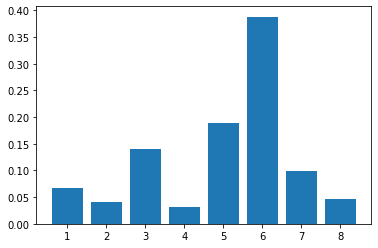

In [22]:
X_bar=list(range(1,9))
plt.bar(X_bar,DecisionTreeClassifierModel.feature_importances_)

# Calculating Prediction

In [23]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 1 0 0 0 0 1 1 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[1.         0.        ]
 [0.65815201 0.34184799]
 [0.11693484 0.88306516]
 [0.86191605 0.13808395]
 [0.96       0.04      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.02905625 0.97094375]
 [0.         1.        ]
 [1.         0.        ]]


# Calculating Confusion Matrix

Confusion Matrix is : 
 [[525  39]
 [ 26 401]]


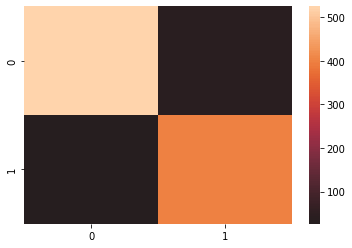

In [24]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Calculating Confusion Matrix

Confusion Matrix is : 
 [[1058   89]
 [  46  818]]


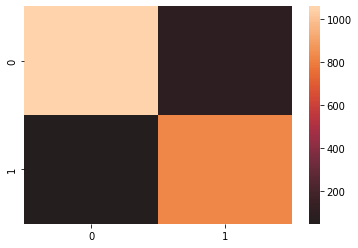

In [25]:
CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Calculating Accuracy Score : ((TP + TN) / float(TP + TN + FP + FN))

In [26]:
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.934409687184662


# Calculating F1 Score : 2 * (precision * recall) / (precision + recall)

In [27]:
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  0.934409687184662


# Calculating Recall Score : (Sensitivity) (TP / float(TP + FN)) 1 / 1+2

In [28]:
RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  0.934409687184662


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))

In [29]:
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.934409687184662


# Calculating Precision recall Curve :

In [30]:
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Precision Value is :  [0.4308779  0.91136364 1.        ]
Recall Value is :  [1.         0.93911007 0.        ]
Thresholds Value is :  [0 1]


# Calculating classification Report 

In [31]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.93      0.94       564
           1       0.91      0.94      0.93       427

    accuracy                           0.93       991
   macro avg       0.93      0.93      0.93       991
weighted avg       0.93      0.93      0.93       991




# Calculating ROC AUC Score

In [32]:
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.9349805670436991


# sava y_pred as csv

In [33]:
submision=[]
for i in y_pred:
    if i==0:
        submision.append('Beginner')
    else:
        submision.append('Intermediate')
submision=pd.DataFrame(submision,columns=['prediction'])
submision.to_csv('/kaggle/working/prediction.csv')
submision

,prediction
0,Beginner
1,Beginner
2,Intermediate
3,Beginner
4,Beginner
...,...
986,Beginner
987,Beginner
988,Intermediate
989,Intermediate
